   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.2 MB/s eta 0:00:00


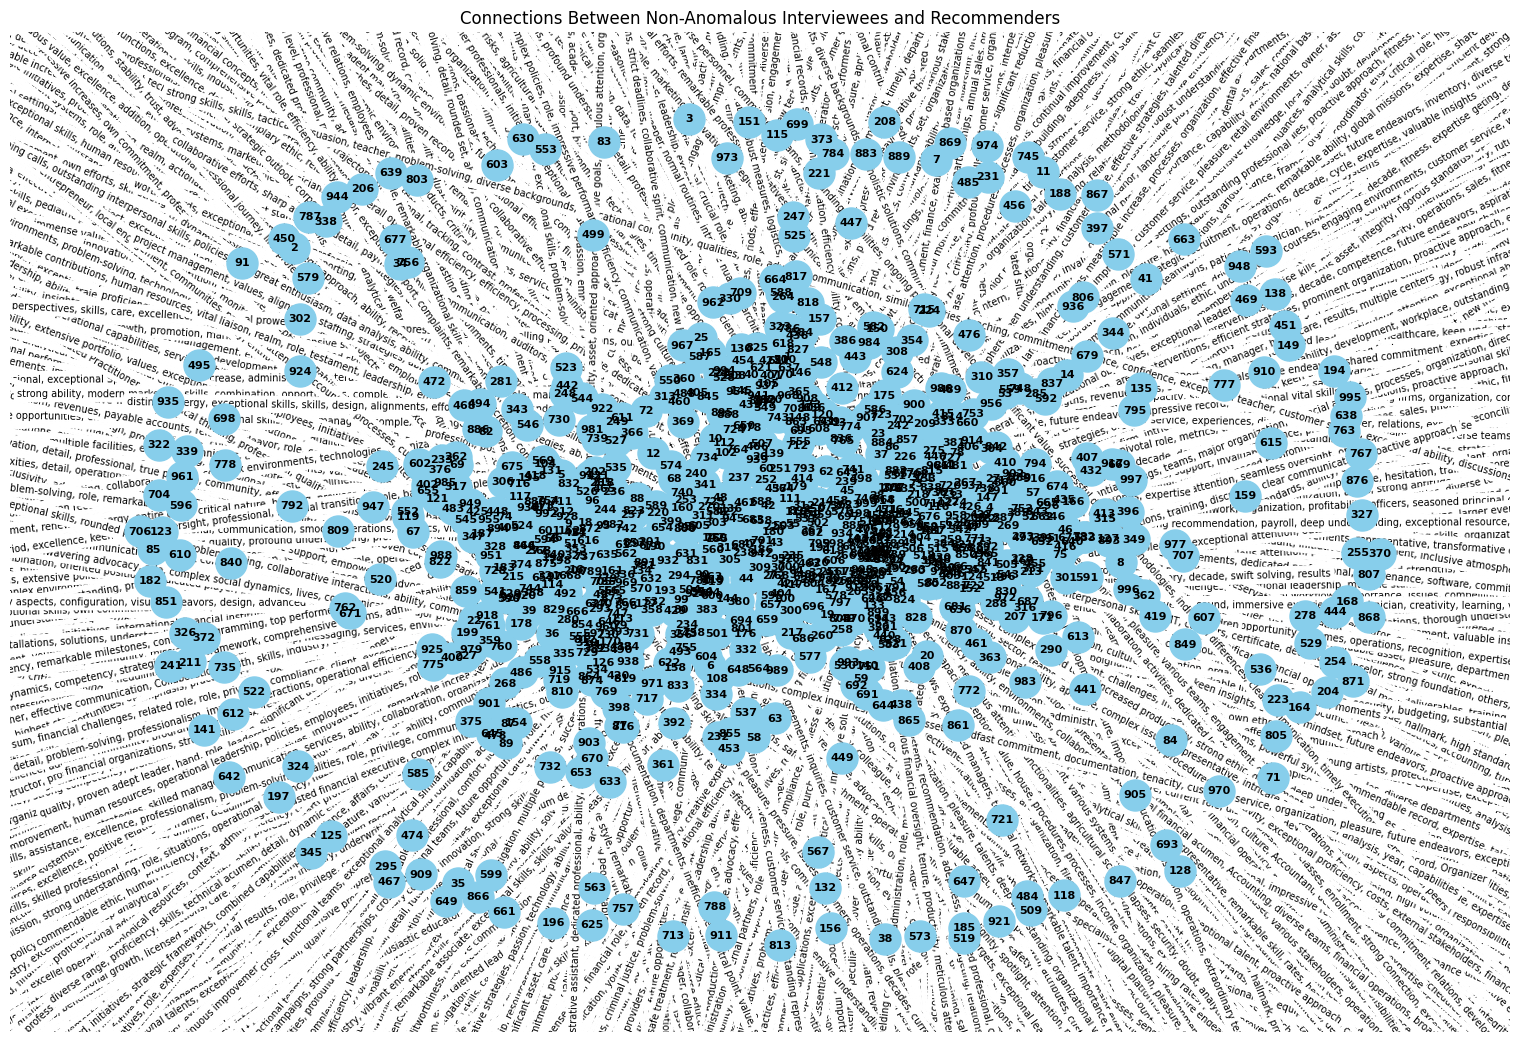

Average Sentiment Score of Recommendations: 0.25


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
!pip install textblob
from textblob import TextBlob  # For sentiment analysis

# Load the CSV files
anomaly_output_path = '/content/anomaly_detection_output-11.csv'
updated_recommendation_scores_path = '/content/updated_recommendation_scores (2).csv'
recommendation_letter_path = '/content/Recommendation_Letter_CSV.csv'

anomaly_output_df = pd.read_csv(anomaly_output_path)
updated_recommendation_scores_df = pd.read_csv(updated_recommendation_scores_path)
recommendation_letter_df = pd.read_csv(recommendation_letter_path)

# Step 1: Filter non-anomalous interviewees
non_anomalous_ids = anomaly_output_df[anomaly_output_df['anomaly'] == False]['profile_id'].tolist()

# Step 2: Filter connections for non-anomalous interviewees in updated_recommendation_scores
filtered_connections_df = updated_recommendation_scores_df[updated_recommendation_scores_df['Interviewee ID'].isin(non_anomalous_ids)]

# Step 3: Build connections using data from both updated recommendation scores and recommendation letters
# Merge the dataframes on Interviewee ID and Recommender ID for more detailed information
merged_df = pd.merge(
    filtered_connections_df,
    recommendation_letter_df,
    on=['Interviewee ID', 'Recommender ID'],
    how='left',
    suffixes=('_updated', '_original')
)

# Step 4: Create the graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in merged_df.iterrows():
    interviewee = row['Interviewee ID']
    recommender = row['Recommender ID']
    skills = row['Skills Vouched for_updated'] if pd.notna(row['Skills Vouched for_updated']) else row['Skills Vouched for_original']
    job_title = row['Recommender Job_updated'] if pd.notna(row['Recommender Job_updated']) else row['Recommender Job_original']

    # Sentiment analysis for 'Skills Vouched for'
    sentiment_score = TextBlob(skills).sentiment.polarity if pd.notna(skills) else 0

    # Add nodes for interviewee and recommender
    G.add_node(interviewee, type='interviewee')
    G.add_node(recommender, type='recommender', job_title=job_title)

    # Add edge with skills vouched for and sentiment score as attributes
    G.add_edge(interviewee, recommender, skills=skills, sentiment_score=sentiment_score)

# Step 5: Plot the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)  # Use a fixed seed for consistent layout
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', arrowsize=10)
edge_labels = nx.get_edge_attributes(G, 'skills')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Connections Between Non-Anomalous Interviewees and Recommenders")
plt.show()

# Additional Analysis: Display the average sentiment score of the network
average_sentiment = merged_df['Skills Vouched for_original'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else 0).mean()
print(f"Average Sentiment Score of Recommendations: {average_sentiment:.2f}")

# Optional: Save the graph to a file if needed
# nx.write_graphml(G, "/mnt/data/interviewee_recommender_network.graphml")


Conservative Language in Recommendations: The recommendations might be using more neutral or reserved language, which results in a moderate sentiment score. In professional contexts, recommenders may prefer formal and neutral language, avoiding excessive praise.
Critical or Constructive Feedback: Some recommendations may include constructive feedback or highlight areas for improvement, contributing to a more balanced and less positive tone.
Standardized Phrases: Many recommendation letters might use generic or standard phrases that convey basic support but lack strong positive sentiment.

Top 20 Central Nodes based on Degree Centrality:
     Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
289   797           0.020141              0.088565                0.043415
209   887           0.015106              0.096479                0.037314
135   658           0.013092              0.110001                0.022155
737   398           0.013092              0.074129                0.026091
512   873           0.013092              0.101419                0.047013
153   891           0.013092              0.089496                0.010495
263   439           0.012085              0.105630                0.021153
407   174           0.012085              0.076026                0.027219
292   445           0.012085              0.094697                0.005887
497   854           0.012085              0.083425                0.009220
257    72           0.012085              0.112307                0.006101
287   857           0.012085              0.087807 

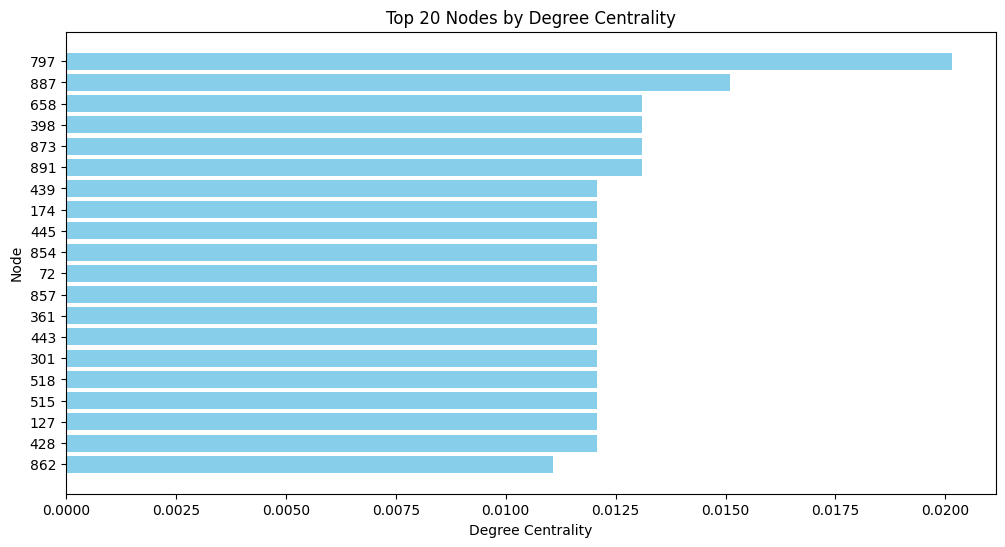

Career Path for Interviewee 797: Financial Accountant with extensive experience in financial reporting and analysis -> dependable professional in their field -> valuable asset to any organization -> valuable asset to any organization -> Senior Accountant -> seasoned staff accountant with over a decade of experience -> Supervisor Accountant managing complex financial reporting -> Staff Accountant -> Staff Accountant with extensive experience in financial reporting -> valuable asset to any organization -> Senior Accountant
Career Path for Interviewee 887: Clinical Service Advocate -> Finance Assistant -> seasoned Dealership Finance Manager with extensive experience in credit and financing -> Finance Manager with extensive experience in banking operations -> Tax Accountant with extensive experience in preparing and reviewing federal and multi-state tax returns for various entities -> Finance Director and Treasurer
Career Path for Interviewee 658: Healthcare Documentation Services Delivery

In [ ]:
import pandas as pd
import networkx as nx

# Update file paths to match your environment
anomaly_output_path = '/content/anomaly_detection_output-11.csv'
updated_recommendation_scores_path = '/content/updated_recommendation_scores (2).csv'
recommendation_letter_path = '/content/Recommendation_Letter_CSV.csv'

# Load the CSV files
anomaly_output_df = pd.read_csv(anomaly_output_path)
updated_recommendation_scores_df = pd.read_csv(updated_recommendation_scores_path)
recommendation_letter_df = pd.read_csv(recommendation_letter_path)

# Step 1: Filter non-anomalous interviewees
non_anomalous_ids = anomaly_output_df[anomaly_output_df['anomaly'] == False]['profile_id'].tolist()

# Step 2: Filter connections for non-anomalous interviewees in updated_recommendation_scores
filtered_connections_df = updated_recommendation_scores_df[updated_recommendation_scores_df['Interviewee ID'].isin(non_anomalous_ids)]

# Step 3: Build connections using data from both updated recommendation scores and recommendation letters
# Merge the dataframes on Interviewee ID and Recommender ID for more detailed information
merged_df = pd.merge(
    filtered_connections_df,
    recommendation_letter_df,
    on=['Interviewee ID', 'Recommender ID'],
    how='left',
    suffixes=('_updated', '_original')
)

# Step 4: Create the graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in merged_df.iterrows():
    interviewee = row['Interviewee ID']
    recommender = row['Recommender ID']
    skills = row['Skills Vouched for_updated'] if pd.notna(row['Skills Vouched for_updated']) else row['Skills Vouched for_original']
    job_title = row['Recommender Job_updated'] if pd.notna(row['Recommender Job_updated']) else row['Recommender Job_original']

    # Add nodes for interviewee and recommender
    G.add_node(interviewee, type='interviewee')
    G.add_node(recommender, type='recommender', job_title=job_title)

    # Add edge with skills vouched for as an attribute
    G.add_edge(interviewee, recommender, skills=skills)

# Step 5: Identify the central nodes using degree, closeness, and betweenness centrality
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Create a DataFrame to store these centrality metrics
centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values())
})

# Sort by Degree Centrality to identify the most connected nodes
central_nodes_df = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(20)

# Display the central nodes
print("Top 20 Central Nodes based on Degree Centrality:")
print(central_nodes_df)
import matplotlib.pyplot as plt

# Plot the degree centrality of the top 20 nodes
plt.figure(figsize=(12, 6))
plt.barh(central_nodes_df['Node'].astype(str), central_nodes_df['Degree Centrality'], color='skyblue')
plt.xlabel('Degree Centrality')
plt.ylabel('Node')
plt.title('Top 20 Nodes by Degree Centrality')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest centrality at the top
plt.show()
# Extract top 10 nodes based on degree centrality for career path analysis
top_interviewees = central_nodes_df['Node'].tolist()

# Extract career paths from the recommendation letters for top interviewees
career_paths = {}
for interviewee in top_interviewees:
    career_paths[interviewee] = merged_df[merged_df['Interviewee ID'] == interviewee]['Recommender Job_original'].dropna().tolist()

# Display career paths for the top 10 interviewees
for interviewee, path in career_paths.items():
    print(f"Career Path for Interviewee {interviewee}: {' -> '.join(path)}")


Task 1 Visualization:

The code creates a horizontal bar chart showing the top 20 nodes based on their degree centrality.
The nodes are sorted from highest to lowest, making it easy to identify the most connected individuals in the network.






Top terms in each skill cluster:
       Cluster 1    Cluster 2     Cluster 3    Cluster 4       Cluster 5
0       customer    financial     financial    technical          skills
1        service   accountant        skills      solving         ability
2         skills    reporting    analytical       skills        programs
3  communication   accounting      analysis  operational     initiatives
4           care    processes    operations     projects      commitment
5     commitment     accuracy   exceptional      complex    organization
6           role       skills       finance   operations  organizational
7        ability   operations  professional      systems     exceptional
8    exceptional   statements  organization   efficiency   communication
9        solving  proficiency     processes      ability            role


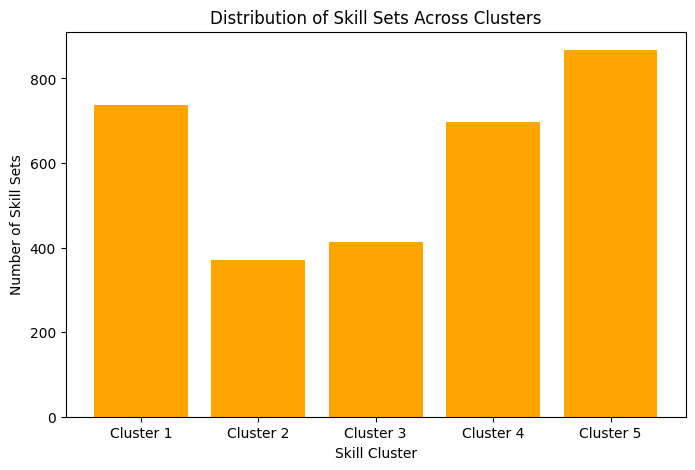

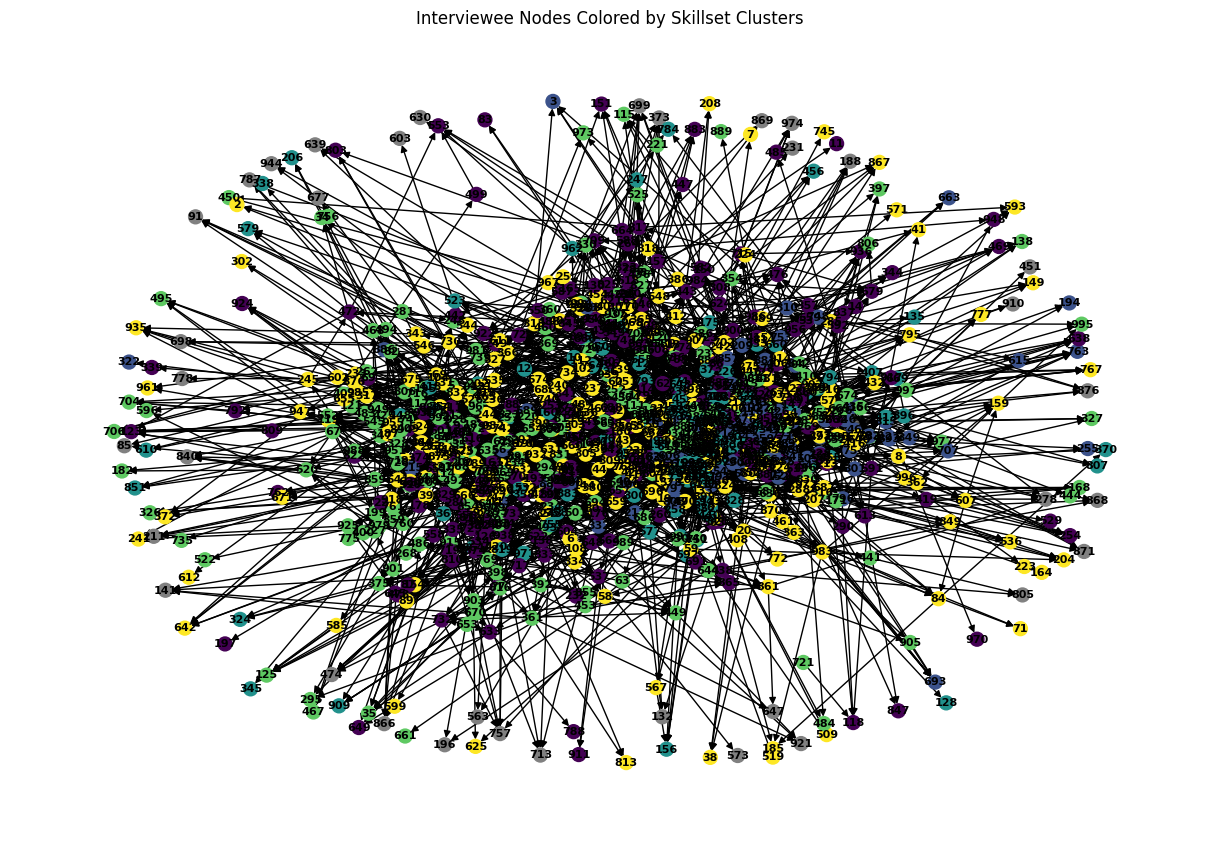


Cross-Cluster Interaction Summary:
    From Cluster  To Cluster Count
0              0           0   296
1              0           1    25
2              0           2    62
3              0           3   115
4              0           4   155
5              1           0    27
6              1           1   195
7              1           2    57
8              1           3    40
9              1           4    12
10             2           0    63
11             2           1    49
12             2           2   144
13             2           3    29
14             2           4    35
15             3           0   112
16             3           1    42
17             3           2    43
18             3           3   267
19             3           4   114
20             4           0   160
21             4           1    11
22             4           2    54
23             4           3   136
24             4           4   361


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ---- Skillset Clustering and Visualization ----

# Extract the 'Skills Vouched for' column from the recommendation letters, dropping NaNs
skills_texts = recommendation_letter_df['Skills Vouched for'].dropna().tolist()

# Vectorize the skill texts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(skills_texts)

# Use KMeans to cluster the skill sets into 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Assign each skill set to a cluster
clusters = kmeans.labels_

# Display the top words in each cluster to understand the common themes
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
cluster_keywords = {}

for i in range(5):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Top 10 terms
    cluster_keywords[f'Cluster {i+1}'] = top_terms

# Convert to DataFrame for display
cluster_keywords_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster_keywords.items()]))

# Display the skill clusters
print("Top terms in each skill cluster:")
print(cluster_keywords_df)

# Count the number of items in each cluster
cluster_counts = np.bincount(clusters)

# Plot the skill clusters
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), cluster_counts, color='orange')
plt.xticks(range(1, 6), [f'Cluster {i}' for i in range(1, 6)])
plt.xlabel('Skill Cluster')
plt.ylabel('Number of Skill Sets')
plt.title('Distribution of Skill Sets Across Clusters')
plt.show()

# ---- Skillset Cluster Visualization on the Network ----

# Extract the 'Skills Vouched for' column from the recommendation letters, dropping NaNs
skills_texts = recommendation_letter_df['Skills Vouched for'].dropna().tolist()
interviewee_ids = recommendation_letter_df['Interviewee ID'].dropna().tolist()

# Vectorize the skill texts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(skills_texts)

# Use KMeans to cluster the skill sets into 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Assign each interviewee to a skill cluster
skill_clusters = kmeans.labels_

# Extract interviewee nodes and their assigned clusters for visualization
interviewee_cluster_mapping = dict(zip(interviewee_ids, skill_clusters))

# Assign colors to skill clusters for visualization
cluster_colors = plt.cm.viridis(np.linspace(0, 1, 5))

# Map interviewee nodes to their skill cluster colors
node_skill_colors = []
for node in G.nodes():
    if node in interviewee_cluster_mapping:
        node_skill_colors.append(cluster_colors[interviewee_cluster_mapping[node]])
    else:
        # Default color for nodes that are not interviewees
        node_skill_colors.append('gray')

# Define the layout position for network visualization
pos = nx.spring_layout(G, seed=42)

# Plot the network with skill cluster coloring
plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=node_skill_colors, with_labels=True, node_size=100, font_size=8, font_weight='bold', arrowsize=10)
plt.title('Interviewee Nodes Colored by Skillset Clusters')
plt.show()

# ---- Cross-Cluster Interaction Analysis ----

# Create a DataFrame to track cross-cluster interactions
cross_cluster_df = pd.DataFrame(columns=['From Cluster', 'To Cluster', 'Count'])

# Identify cross-cluster interactions
for _, row in merged_df.iterrows():
    interviewee = row['Interviewee ID']
    recommender = row['Recommender ID']

    # Get cluster information
    interviewee_cluster = interviewee_cluster_mapping.get(interviewee, 'Unknown')
    recommender_cluster = interviewee_cluster_mapping.get(recommender, 'Unknown')

    if interviewee_cluster != 'Unknown' and recommender_cluster != 'Unknown':
        # Create a new row as a DataFrame
        new_row = pd.DataFrame({
            'From Cluster': [interviewee_cluster],
            'To Cluster': [recommender_cluster],
            'Count': [1]
        })

        # Concatenate the new row to the cross_cluster_df
        cross_cluster_df = pd.concat([cross_cluster_df, new_row], ignore_index=True)

# Group by and count cross-cluster interactions
cross_cluster_summary = cross_cluster_df.groupby(['From Cluster', 'To Cluster']).sum().reset_index()

# Display cross-cluster dynamics
print("\nCross-Cluster Interaction Summary:")
print(cross_cluster_summary)


This table is valuable for understanding the social dynamics within the professional network, particularly how different skill groups are connected.
The "Cross-Cluster Interaction Summary" table represents the number of interactions between different skill clusters within the network. Here's a breakdown of the table's columns and what each part means:

From Cluster: This column represents the originating cluster (skill group) of the interviewee or the individual who is making a recommendation.
To Cluster: This column represents the target cluster (skill group) of the recommender, or the individual who receives the recommendation.
Count: This column shows the number of interactions (or recommendations) that have occurred between the clusters specified in the "From Cluster" and "To Cluster" columns.
Interpreting the Table:
Intra-Cluster Interactions (e.g., "0 -> 0," "1 -> 1"):

These rows indicate interactions within the same cluster. For example, "0 -> 0" with a count of 296 means that there were 296 interactions where both the interviewee and the recommender belonged to cluster 0.
Larger counts for intra-cluster interactions suggest strong internal connections within specific skill groups.
Cross-Cluster Interactions (e.g., "0 -> 1," "1 -> 2"):

These rows indicate interactions between different clusters. For example, "0 -> 1" with a count of 25 means there were 25 interactions where an interviewee from cluster 0 received a recommendation from someone in cluster 1.
This helps in understanding the network's cross-group dynamics, showing how clusters are interconnected.
Key Observations:
Strong Intra-Cluster Interactions:

The highest intra-cluster counts are for "0 -> 0" (296), "1 -> 1" (195), "2 -> 2" (144), "3 -> 3" (267), and "4 -> 4" (361). This suggests that individuals within the same skill cluster tend to recommend each other more frequently. Such patterns may indicate strong cohesion within those groups.
Cross-Cluster Connections:

For cross-cluster interactions, notable counts include "0 -> 4" (155) and "4 -> 0" (160), indicating a significant number of interactions between clusters 0 and 4. These interactions might represent connections between different types of professionals, possibly showcasing multidisciplinary collaborations.
The presence of various cross-cluster interactions (e.g., "0 -> 1," "1 -> 2") indicates that there is a network of interactions connecting individuals across different skill clusters, suggesting diversity in professional relationships.


The image displays the network of interviewees and recommenders, where nodes are colored based on the interviewees' skillset clusters. Let's break down the key elements of this visualization:

1. Nodes (Circles) and Their Colors:
Each node represents either an interviewee or a recommender.
Color-coded clusters:
The nodes are colored based on the interviewees' skill clusters identified using KMeans clustering.
Different colors correspond to different skill clusters, indicating areas of expertise vouched for in the recommendation letters.
Interviewee nodes are assigned colors from five clusters, while non-interviewee nodes (recommenders) are shown in gray.
2. Node Labels (Numbers):
The numbers on the nodes represent the Interviewee IDs.
This labeling helps identify specific interviewees and their connections within the network.
Non-labeled nodes are likely recommenders or nodes with a degree of less importance in the network based on clustering relevance.
3. Edges (Lines and Arrows):
The edges (lines with arrows) indicate the direction of recommendations:
An arrow pointing from Node A to Node B signifies that Node A (the recommender) endorsed Node B (the interviewee).
The density of edges suggests a complex network of recommendations, indicating interactions among various professional circles.
4. Clusters in the Network:
The image shows a dense core of interconnected nodes, indicating a tightly-knit group of interviewees and recommenders. These central clusters may represent a core group of professionals who frequently endorse each other.
The peripheral nodes (those toward the outer edges of the network) represent individuals with fewer or more isolated connections. These could be less integrated into the main professional network.
5. Skill Clusters:
The color distribution of nodes reveals how different skill clusters are spread throughout the network. For example:
Some clusters (e.g., nodes with a specific color) appear more concentrated in certain parts of the network, possibly indicating sub-groups or communities with similar skill sets.
The diversity of colors in the dense core suggests that central nodes have endorsements for a variety of skill sets.
Insights:
The dense core with various skill colors indicates a network of professionals endorsing a wide range of skills. This central cluster could be significant for organizations looking to identify key influencers or diverse talent.
Peripheral nodes may indicate individuals who are either less connected or have niche skill sets.
Identifying which skill clusters are most centrally located (based on color) can help organizations understand the dominant skill sets within influential groups.

Task 2 Visualization:

The code creates a bar chart showing the number of skill sets in each of the 5 clusters.
This helps in understanding the distribution of skills vouched for across different clusters.


Top 10 Nodes by Degree Centrality:
     Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
289   797           0.020141              0.088565                0.043415
209   887           0.015106              0.096479                0.037314
135   658           0.013092              0.110001                0.022155
737   398           0.013092              0.074129                0.026091
512   873           0.013092              0.101419                0.047013
153   891           0.013092              0.089496                0.010495
263   439           0.012085              0.105630                0.021153
407   174           0.012085              0.076026                0.027219
292   445           0.012085              0.094697                0.005887
497   854           0.012085              0.083425                0.009220

Top 10 Nodes by Closeness Centrality:
     Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
530   263           0.0070

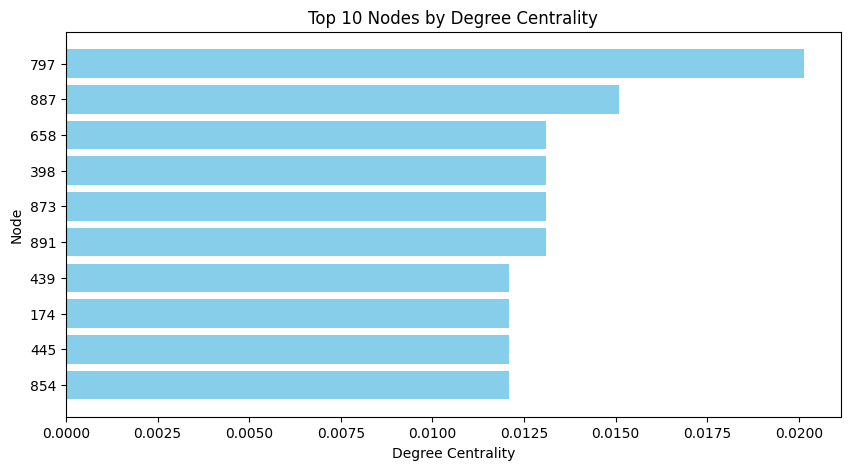

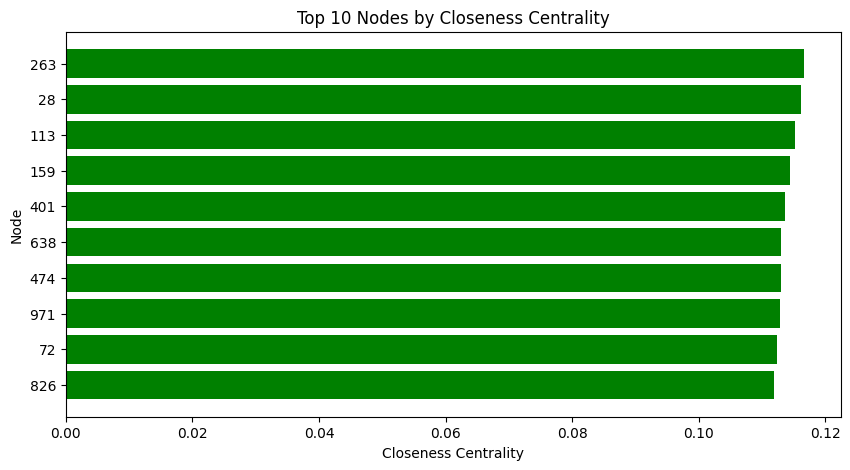

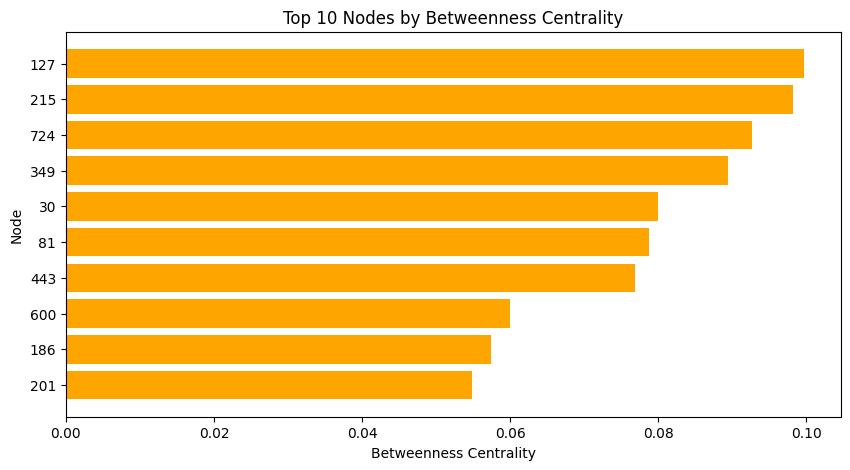


Average Sentiment Score of Recommendations: 0.25
Career Path for Interviewee 797: Financial Accountant with extensive experience in financial reporting and analysis -> dependable professional in their field -> valuable asset to any organization -> valuable asset to any organization -> Senior Accountant -> seasoned staff accountant with over a decade of experience -> Supervisor Accountant managing complex financial reporting -> Staff Accountant -> Staff Accountant with extensive experience in financial reporting -> valuable asset to any organization -> Senior Accountant
Career Path for Interviewee 887: Clinical Service Advocate -> Finance Assistant -> seasoned Dealership Finance Manager with extensive experience in credit and financing -> Finance Manager with extensive experience in banking operations -> Tax Accountant with extensive experience in preparing and reviewing federal and multi-state tax returns for various entities -> Finance Director and Treasurer
Career Path for Interview

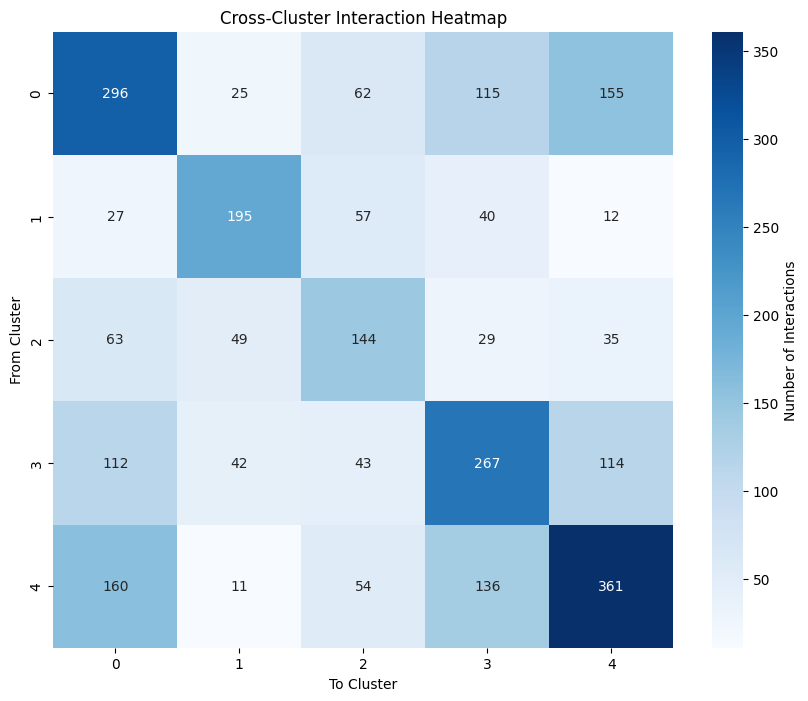

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob  # For sentiment analysis

# Update file paths to match your environment
anomaly_output_path = '/content/anomaly_detection_output-11.csv'
updated_recommendation_scores_path = '/content/updated_recommendation_scores (2).csv'
recommendation_letter_path = '/content/Recommendation_Letter_CSV.csv'

# Load the CSV files
anomaly_output_df = pd.read_csv(anomaly_output_path)
updated_recommendation_scores_df = pd.read_csv(updated_recommendation_scores_path)
recommendation_letter_df = pd.read_csv(recommendation_letter_path)

# Step 1: Filter non-anomalous interviewees
non_anomalous_ids = anomaly_output_df[anomaly_output_df['anomaly'] == False]['profile_id'].tolist()

# Step 2: Filter connections for non-anomalous interviewees in updated_recommendation_scores
filtered_connections_df = updated_recommendation_scores_df[updated_recommendation_scores_df['Interviewee ID'].isin(non_anomalous_ids)]

# Step 3: Build connections using data from both updated recommendation scores and recommendation letters
merged_df = pd.merge(
    filtered_connections_df,
    recommendation_letter_df,
    on=['Interviewee ID', 'Recommender ID'],
    how='left',
    suffixes=('_updated', '_original')
)

# Step 4: Create the graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in merged_df.iterrows():
    interviewee = row['Interviewee ID']
    recommender = row['Recommender ID']
    skills = row['Skills Vouched for_updated'] if pd.notna(row['Skills Vouched for_updated']) else row['Skills Vouched for_original']
    job_title = row['Recommender Job_updated'] if pd.notna(row['Recommender Job_updated']) else row['Recommender Job_original']

    # Sentiment analysis for 'Skills Vouched for'
    sentiment_score = TextBlob(skills).sentiment.polarity if pd.notna(skills) else 0

    # Add nodes for interviewee and recommender
    G.add_node(interviewee, type='interviewee')
    G.add_node(recommender, type='recommender', job_title=job_title)

    # Add edge with skills vouched for and sentiment score as attributes
    G.add_edge(interviewee, recommender, skills=skills, sentiment_score=sentiment_score)

# Step 5: Identify centrality metrics for the entire network
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Create a DataFrame to store these centrality metrics
network_metrics_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values())
})

# Sort nodes by each centrality measure
top_degree = network_metrics_df.sort_values(by='Degree Centrality', ascending=False).head(10)
top_closeness = network_metrics_df.sort_values(by='Closeness Centrality', ascending=False).head(10)
top_betweenness = network_metrics_df.sort_values(by='Betweenness Centrality', ascending=False).head(10)

# Display the top nodes for each centrality metric
print("Top 10 Nodes by Degree Centrality:")
print(top_degree)
print("\nTop 10 Nodes by Closeness Centrality:")
print(top_closeness)
print("\nTop 10 Nodes by Betweenness Centrality:")
print(top_betweenness)

# Step 6: Visualize centrality metrics

# Degree Centrality
plt.figure(figsize=(10, 5))
plt.barh(top_degree['Node'].astype(str), top_degree['Degree Centrality'], color='skyblue')
plt.xlabel('Degree Centrality')
plt.ylabel('Node')
plt.title('Top 10 Nodes by Degree Centrality')
plt.gca().invert_yaxis()
plt.show()

# Closeness Centrality
plt.figure(figsize=(10, 5))
plt.barh(top_closeness['Node'].astype(str), top_closeness['Closeness Centrality'], color='green')
plt.xlabel('Closeness Centrality')
plt.ylabel('Node')
plt.title('Top 10 Nodes by Closeness Centrality')
plt.gca().invert_yaxis()
plt.show()

# Betweenness Centrality
plt.figure(figsize=(10, 5))
plt.barh(top_betweenness['Node'].astype(str), top_betweenness['Betweenness Centrality'], color='orange')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Node')
plt.title('Top 10 Nodes by Betweenness Centrality')
plt.gca().invert_yaxis()
plt.show()

# Step 7: Sentiment Analysis Summary
average_sentiment = merged_df['Skills Vouched for_original'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else 0).mean()
print(f"\nAverage Sentiment Score of Recommendations: {average_sentiment:.2f}")

# Step 8: Career Path Mapping for Top Nodes
career_paths = {}
for interviewee in top_degree['Node'].tolist():
    career_paths[interviewee] = merged_df[merged_df['Interviewee ID'] == interviewee]['Recommender Job_original'].dropna().tolist()

# Display career paths for top interviewees
for interviewee, path in career_paths.items():
    print(f"Career Path for Interviewee {interviewee}: {' -> '.join(path)}")

# Step 9: Cross-Cluster Interaction Analysis
# Assuming `interviewee_cluster_mapping` has been created in the earlier clustering steps
cross_cluster_df = pd.DataFrame(columns=['From Cluster', 'To Cluster', 'Count'])

# Identify cross-cluster interactions
for _, row in merged_df.iterrows():
    interviewee = row['Interviewee ID']
    recommender = row['Recommender ID']

    # Get cluster information
    interviewee_cluster = interviewee_cluster_mapping.get(interviewee, 'Unknown')
    recommender_cluster = interviewee_cluster_mapping.get(recommender, 'Unknown')

    if interviewee_cluster != 'Unknown' and recommender_cluster != 'Unknown':
        # Create a new row as a DataFrame
        new_row = pd.DataFrame({
            'From Cluster': [interviewee_cluster],
            'To Cluster': [recommender_cluster],
            'Count': [1]
        })

        # Concatenate the new row to the cross_cluster_df
        cross_cluster_df = pd.concat([cross_cluster_df, new_row], ignore_index=True)

# Group by and count cross-cluster interactions
cross_cluster_summary = cross_cluster_df.groupby(['From Cluster', 'To Cluster']).sum().reset_index()

# Display cross-cluster dynamics
print("\nCross-Cluster Interaction Summary:")
print(cross_cluster_summary)

# Step 10: Visualize Cross-Cluster Interactions
# Optional: Plot a heatmap or another suitable visualization for cross-cluster interactions if needed
import seaborn as sns  # For heatmap visualization
# Create a pivot table for cross-cluster interactions to be used in the heatmap
cross_cluster_matrix = cross_cluster_summary.pivot(index='From Cluster', columns='To Cluster', values='Count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_cluster_matrix, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Number of Interactions'})
plt.title('Cross-Cluster Interaction Heatmap')
plt.xlabel('To Cluster')
plt.ylabel('From Cluster')
plt.show()

1. Degree Centrality:
Top Nodes: Nodes 797, 887, and 658 have the highest degree centrality. This means they are the most connected nodes in the network, either receiving many recommendations or recommending many others.
Implication: High degree centrality suggests these individuals play a key role in the network by connecting with many others. They could be influential figures with broad professional networks, such as managers or team leads who frequently vouch for others.
2. Closeness Centrality:
Top Nodes: Nodes like 263, 28, and 113 have the highest closeness centrality. These nodes have shorter average distances to all other nodes in the network.
Implication: High closeness centrality indicates that these nodes can quickly interact with others, making them potentially key facilitators in information flow. In the context of recommendations, they might be in positions that allow them to interact with various professional clusters, such as HR personnel or consultants.
3. Betweenness Centrality:
Top Nodes: Nodes 127, 215, and 724 have the highest betweenness centrality. These nodes lie on the shortest paths between many other nodes.
Implication: High betweenness centrality signifies that these individuals act as bridges or gatekeepers within the network. They have the power to connect disparate groups or clusters, which suggests they could be pivotal in influencing or facilitating collaborations between different professional circles.

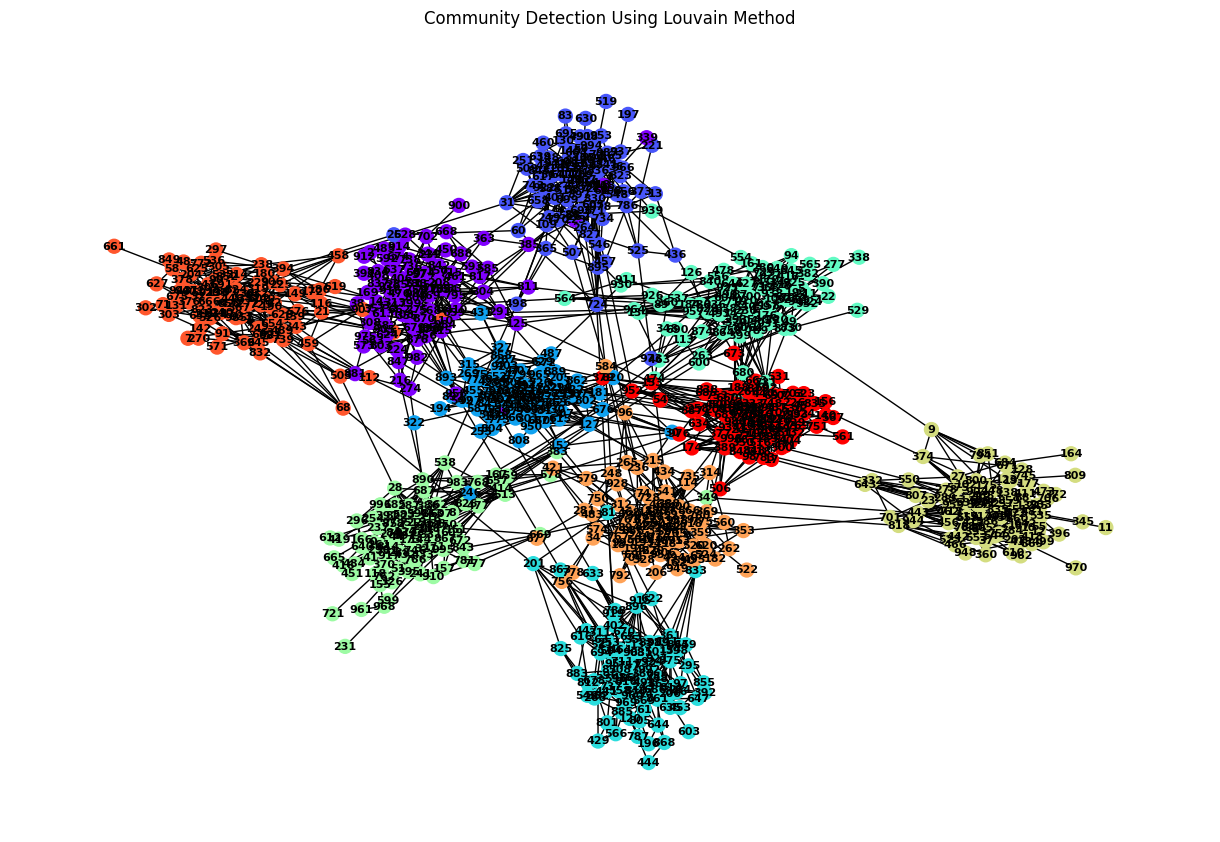

Community Sizes:
0    100
1    101
2    101
3     97
4    101
5     99
6     99
7     98
8     99
9     99
Name: count, dtype: int64


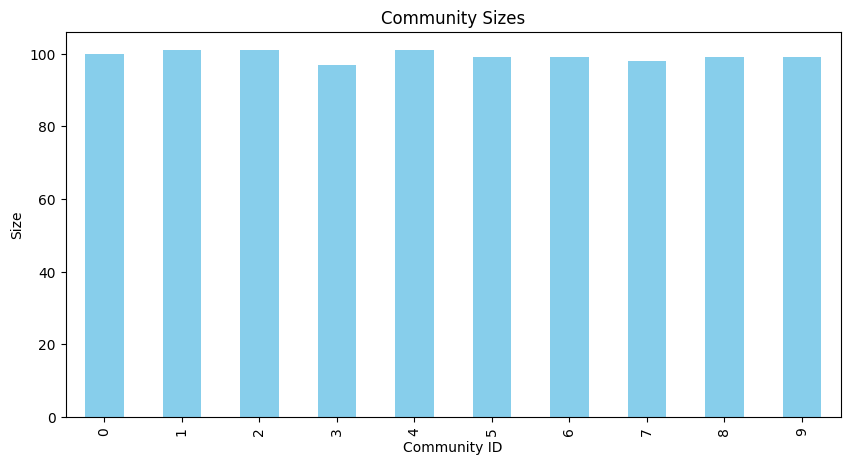


Cross-Community Interaction Summary:
    From Community  To Community Count
0                0             0   234
1                0             2     1
2                0             4     1
3                0             5     1
4                1             0     2
5                1             1   276
6                1             3     1
7                1             4     5
8                1             5     1
9                1             7     2
10               1             9     1
11               2             0     2
12               2             2   299
13               2             4     4
14               2             5     5
15               2             6     2
16               2             7     4
17               2             8     1
18               2             9     1
19               3             0     2
20               3             3   251
21               3             4     1
22               3             9     1
23               4        

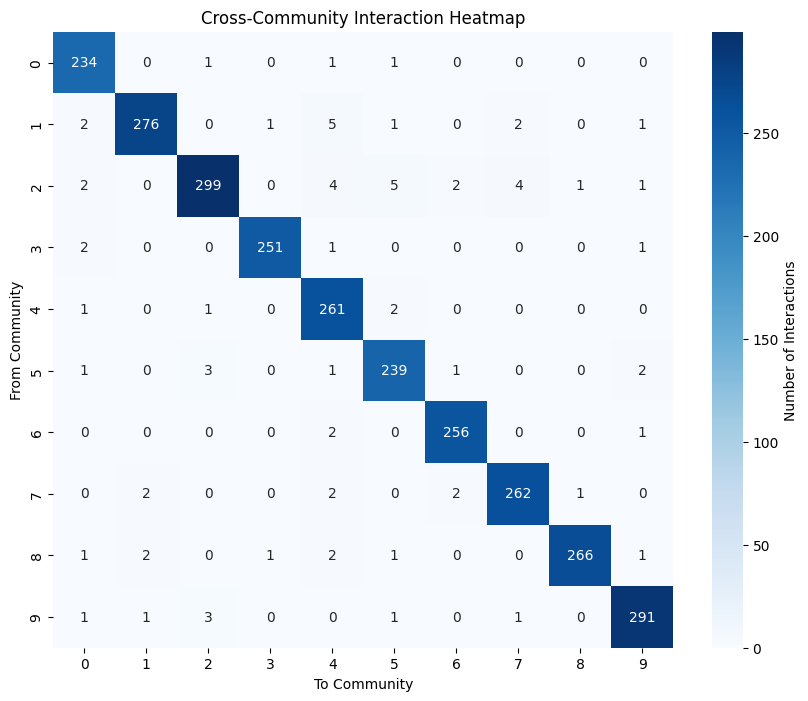

Top terms in each skill cluster:
       Cluster 1    Cluster 2     Cluster 3    Cluster 4       Cluster 5
0       customer    financial     financial    technical          skills
1        service   accountant        skills      solving         ability
2         skills    reporting    analytical       skills        programs
3  communication   accounting      analysis  operational     initiatives
4           care    processes    operations     projects      commitment
5     commitment     accuracy   exceptional      complex    organization
6           role       skills       finance   operations  organizational
7        ability   operations  professional      systems     exceptional
8    exceptional   statements  organization   efficiency   communication
9        solving  proficiency     processes      ability            role


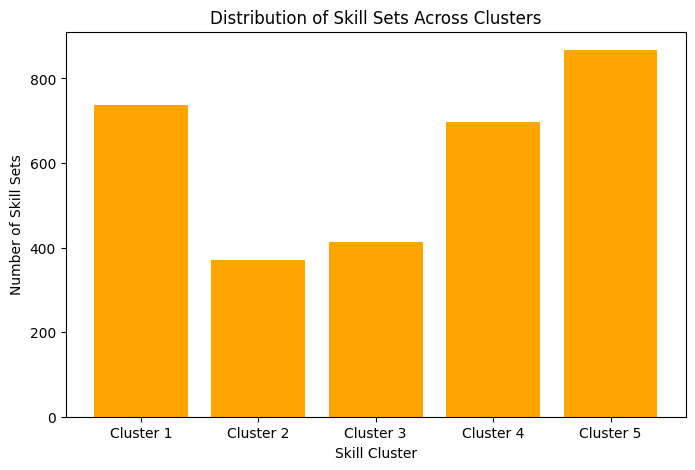

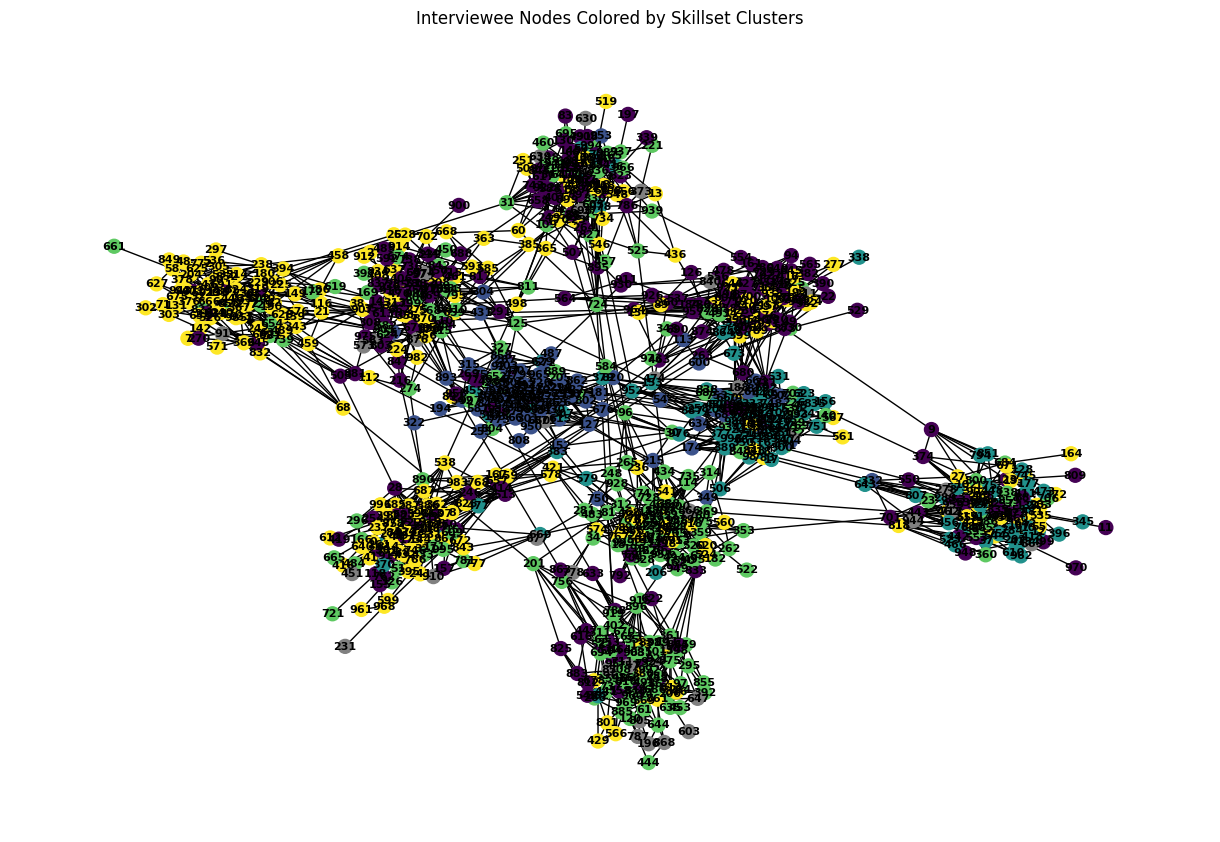

In [ ]:
# Install the community (Louvain) package if not already installed
!pip install python-louvain

# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # For the Louvain method
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns  # For heatmap visualization

# ---- Community Detection Using Louvain Method ----

# Convert the directed graph to an undirected graph
G_undirected = G.to_undirected()

# Perform community detection on the undirected graph using the Louvain method
partition = community_louvain.best_partition(G_undirected)

# Extract unique communities
communities = set(partition.values())

# Assign colors to communities for visualization
community_colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

# Map each node to a color based on its community
node_community_colors = [community_colors[partition[node]] for node in G_undirected.nodes()]

# Define the layout position for network visualization
pos = nx.spring_layout(G_undirected, seed=42)

# Plot the network with community coloring
plt.figure(figsize=(12, 8))
nx.draw(G_undirected, pos, node_color=node_community_colors, with_labels=True, node_size=100, font_size=8, font_weight='bold', arrowsize=10)
plt.title('Community Detection Using Louvain Method')
plt.show()

# ---- Further Community Analysis ----

# Analyze community sizes
community_sizes = pd.Series(list(partition.values())).value_counts().sort_index()
print("Community Sizes:")
print(community_sizes)

# Plot the community sizes
plt.figure(figsize=(10, 5))
community_sizes.plot(kind='bar', color='skyblue')
plt.xlabel('Community ID')
plt.ylabel('Size')
plt.title('Community Sizes')
plt.show()

# ---- Cross-Community Interaction Analysis ----

# Create a DataFrame to track cross-community interactions
cross_community_df = pd.DataFrame(columns=['From Community', 'To Community', 'Count'])

# Identify cross-community interactions
for edge in G_undirected.edges(data=True):
    from_node = edge[0]
    to_node = edge[1]

    # Get community information
    from_community = partition.get(from_node, 'Unknown')
    to_community = partition.get(to_node, 'Unknown')

    if from_community != 'Unknown' and to_community != 'Unknown':
        # Create a new row as a DataFrame
        new_row = pd.DataFrame({
            'From Community': [from_community],
            'To Community': [to_community],
            'Count': [1]
        })

        # Concatenate the new row to the cross_community_df
        cross_community_df = pd.concat([cross_community_df, new_row], ignore_index=True)

# Group by and count cross-community interactions
cross_community_summary = cross_community_df.groupby(['From Community', 'To Community']).sum().reset_index()

# Display cross-community interaction summary
print("\nCross-Community Interaction Summary:")
print(cross_community_summary)

# ---- Visualize Cross-Community Interactions ----

# Create a pivot table for cross-community interactions to be used in the heatmap
cross_community_matrix = cross_community_summary.pivot(index='From Community', columns='To Community', values='Count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_community_matrix, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Number of Interactions'})
plt.title('Cross-Community Interaction Heatmap')
plt.xlabel('To Community')
plt.ylabel('From Community')
plt.show()

# ---- Skillset Clustering and Visualization ----

# Extract the 'Skills Vouched for' column from the recommendation letters, dropping NaNs
skills_texts = recommendation_letter_df['Skills Vouched for'].dropna().tolist()

# Vectorize the skill texts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(skills_texts)

# Use KMeans to cluster the skill sets into 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Assign each skill set to a cluster
clusters = kmeans.labels_

# Display the top words in each cluster to understand the common themes
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
cluster_keywords = {}

for i in range(5):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Top 10 terms
    cluster_keywords[f'Cluster {i+1}'] = top_terms

# Convert to DataFrame for display
cluster_keywords_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster_keywords.items()]))

# Display the skill clusters
print("Top terms in each skill cluster:")
print(cluster_keywords_df)

# Count the number of items in each cluster
cluster_counts = np.bincount(clusters)

# Plot the skill clusters
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), cluster_counts, color='orange')
plt.xticks(range(1, 6), [f'Cluster {i}' for i in range(1, 6)])
plt.xlabel('Skill Cluster')
plt.ylabel('Number of Skill Sets')
plt.title('Distribution of Skill Sets Across Clusters')
plt.show()

# ---- Skillset Cluster Visualization on the Network ----

# Extract the 'Skills Vouched for' column from the recommendation letters, dropping NaNs
skills_texts = recommendation_letter_df['Skills Vouched for'].dropna().tolist()
interviewee_ids = recommendation_letter_df['Interviewee ID'].dropna().tolist()

# Vectorize the skill texts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(skills_texts)

# Use KMeans to cluster the skill sets into 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Assign each interviewee to a skill cluster
skill_clusters = kmeans.labels_

# Extract interviewee nodes and their assigned clusters for visualization
interviewee_cluster_mapping = dict(zip(interviewee_ids, skill_clusters))

# Assign colors to skill clusters for visualization
cluster_colors = plt.cm.viridis(np.linspace(0, 1, 5))

# Map interviewee nodes to their skill cluster colors
node_skill_colors = []
for node in G.nodes():
    if node in interviewee_cluster_mapping:
        node_skill_colors.append(cluster_colors[interviewee_cluster_mapping[node]])
    else:
        # Default color for nodes that are not interviewees
        node_skill_colors.append('gray')

# Plot the network with skill cluster coloring
plt.figure(figsize=(12, 8))
nx.draw(G_undirected, pos, node_color=node_skill_colors, with_labels=True, node_size=100, font_size=8, font_weight='bold', arrowsize=10)
plt.title('Interviewee Nodes Colored by Skillset Clusters')
plt.show()


Insights from the Heatmap:

Strong Within-Community Interactions: The darkest cells lie along the diagonal, indicating that most interactions occur within the same community. This suggests that members of a particular community tend to interact more frequently with others in the same group.
Sparse Cross-Community Interactions: Off-diagonal cells are mostly lighter or empty, indicating relatively fewer interactions between different communities. This can suggest that the communities are relatively well-defined and have limited cross-community interaction.
Specific Cross-Community Dynamics: Some off-diagonal cells do have values greater than zero, indicating the presence of cross-community interactions. For example:
The cell (1,4) shows a value of 5, indicating that there are 5 interactions from Community 1 to Community 4.
These cross-community interactions, while less frequent, might indicate important bridges or influential connections between different groups.
Overall Interpretation:
Community Cohesiveness: The strong values along the diagonal suggest that each community is relatively cohesive, with members primarily interacting within their group.
Cross-Community Connections: The lighter off-diagonal cells show that cross-community interactions are present but limited. These connections can be crucial for understanding the network's overall structure, identifying potential bridges between different communities, or finding individuals who interact across different groups.

1. Community Detection Using the Louvain Method (First Image):
Nodes: Each node represents an interviewee or a recommender in the network.
Colors: Different colors correspond to distinct communities identified by the Louvain method. Each community represents a group of nodes that are more densely connected with each other than with the rest of the network.
Structure: The graph displays clusters, or sub-networks, that appear to be somewhat isolated from each other. This indicates that the network consists of several distinct communities. These communities might represent professional circles or groups of people with mutual endorsements or interactions.
Interconnections: Some connections between different communities suggest cross-community interactions, possibly indicating individuals who bridge different professional groups.
Insight: This visualization highlights key communities within the network, which can help in understanding how individuals are grouped based on their connections. Identifying central nodes within these communities might reveal influencers or key connectors in specific professional circles.
2. Skill Clusters and Distribution (Second Image):
Top Terms in Skill Clusters: The table lists the top terms for each of the five skill clusters identified through KMeans clustering. For example:
Cluster 1 emphasizes customer-related skills like "customer service" and "communication."
Cluster 2 focuses on financial skills, featuring terms like "financial," "accountant," and "reporting."
Cluster 3 covers analytical and finance-related skills, highlighting "analytical," "operations," and "processes."
Cluster 4 includes technical and problem-solving skills such as "technical," "solving," and "projects."
Cluster 5 involves organizational and program management skills, with words like "skills," "programs," "communication," and "role."
Distribution of Skill Sets Across Clusters (Bar Chart): This bar chart shows how interviewees' skill sets are distributed across the five clusters.
Clusters 1 and 5 have the highest counts, suggesting that a larger number of individuals possess skills related to customer service, communication, organizational, and program management.
Cluster 2 has the lowest count, indicating that financial skills are less common in this network.
3. Interviewee Nodes Colored by Skillset Clusters (Third Image):
Nodes: The nodes represent interviewees, and their colors correspond to the skill clusters identified in the KMeans clustering.
Colors: The nodes are colored based on their assigned skill clusters:
Different colors represent different skill clusters as seen in the previous table.
Non-interviewee nodes (recommenders) are likely shown in gray or left uncolored.
Network Structure: The graph illustrates how individuals with similar skill sets are distributed across the network. For example, some clusters of nodes with the same color indicate groups of individuals with similar skills that are closely connected in the network.
Overlap and Interconnections: The presence of different skill colors in close proximity suggests collaboration or interactions between individuals with diverse skill sets within certain sub-networks.
Combining Insights:
Communities and Skill Clusters: Comparing the first and third images, it is apparent that some communities consist of individuals with similar skills, while others are more diverse. This observation can be crucial in identifying specialized groups or multi-skilled teams.
Skill Distribution: The distribution of skill sets (bar chart) reveals that the network is dominated by specific types of skills (e.g., customer service, organizational skills), which can inform recruitment strategies or highlight areas for skill development.
Key Nodes: From the community and skillset visualizations, identifying central nodes within each community can point to influential individuals who bridge multiple groups or possess diverse skill sets.
These visualizations together provide a comprehensive overview of the network's structure, community composition, and skillset distribution. Further analysis could involve zooming in on specific communities or exploring how certain skills are interconnected within the professional network.






